
# 🏠 EXERCICE PRATIQUE - Régression avec California Housing Dataset

**Formation IA & ML - SupNum Nouakchott**  
**Formateur:** Mohamed Beydia - Vela Learning

---

## 🎯 Objectifs de cet Exercice

Dans cet exercice, vous allez appliquer les concepts de régression appris en cours sur un **dataset réel** : 
le California Housing Dataset qui contient des informations sur les prix des maisons en Californie.

**🎯 Vos missions :**
- [ ] Charger et explorer le dataset California Housing
- [ ] Effectuer une analyse exploratoire des données (EDA)
- [ ] Préparer les données (nettoyage, train/test split)
- [ ] Construire plusieurs modèles de régression
- [ ] Comparer les performances des modèles
- [ ] Interpréter les résultats et faire des recommandations

**📊 Dataset :** 20,640 observations de districts californiens avec 8 caractéristiques
**🎯 Target :** Prix médian des maisons (en centaines de milliers de dollars)

---

## 📋 Instructions Générales

- Suivez les étapes dans l'ordre
- Complétez le code là où vous voyez `# VOTRE CODE ICI`
- Répondez aux questions dans les cellules markdown
- Justifiez vos choix de modèles et d'hyperparamètres
- N'hésitez pas à ajouter des visualisations supplémentaires

---

============================================================================
ÉTAPE 1: IMPORTS ET CHARGEMENT DES DONNÉES
============================================================================

In [2]:
print("🚀 ÉTAPE 1: IMPORTS ET CHARGEMENT DES DONNÉES")
print("="*60)

🚀 ÉTAPE 1: IMPORTS ET CHARGEMENT DES DONNÉES


In [3]:
# VOTRE CODE ICI - Importez les librairies nécessaires
from sklearn.pipeline import Pipeline
import joblib

# Indice: numpy, pandas, matplotlib, seaborn, sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Configuration des graphiques
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

In [5]:
print("✅ Librairies importées avec succès!")

✅ Librairies importées avec succès!


In [6]:
# Chargement du dataset California Housing
print("\n📊 Chargement du dataset California Housing...")


📊 Chargement du dataset California Housing...


In [ ]:
"""Mes questions  / Problemes 
1 - Quelle est la différence entre as_frame = True as attributed et california_housing.frame : les deux créent un dataframe ? 
2- la matrice de corrélation n'affiche que les valeurs de la première ligne 
"""

"Mes questions \n1 - quel est la difference entre as_frame = True comme attribue et california_housing.frame : n'est ce pas le deux cree des frame \n"

In [69]:
# VOTRE CODE ICI - Chargez le dataset avec fetch_california_housing()
# Indice: utilisez return_X_y=False pour avoir les noms des features
california_housing = fetch_california_housing(as_frame=True, return_X_y=False)
X= california_housing.feature_names
print(X)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
# Création du DataFrame complet
data = california_housing.frame

In [9]:
print(f"✅ Dataset chargé: {data.shape[0]} observations, {data.shape[1]} variables")
print("\n📋 Aperçu des premières lignes:")
print(data.head())

✅ Dataset chargé: 20640 observations, 9 variables

📋 Aperçu des premières lignes:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [10]:
print("""
=== Signification des features du dataset California Housing ===

-  MedInc     : revenu médian des ménages dans la zone
 - HouseAge   : âge médian des maisons dans la zone
 - AveRooms   : nombre moyen de pièces par logement
 - AveBedrms  : nombre moyen de chambres par logement
 - Population : population totale de la zone
 - AveOccup   : nombre moyen de personnes par logement
 - Latitude   : latitude de la zone
 - Longitude  : longitude de la zone

Plus d'infos ici : https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html
""")



=== Signification des features du dataset California Housing ===

-  MedInc     : revenu médian des ménages dans la zone
 - HouseAge   : âge médian des maisons dans la zone
 - AveRooms   : nombre moyen de pièces par logement
 - AveBedrms  : nombre moyen de chambres par logement
 - Population : population totale de la zone
 - AveOccup   : nombre moyen de personnes par logement
 - Latitude   : latitude de la zone
 - Longitude  : longitude de la zone

Plus d'infos ici : https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html



In [11]:
print("\n📊 Informations sur le dataset:")
print(data.info())


📊 Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


============================================================================
ÉTAPE 2: EXPLORATION DES DONNÉES (EDA)
============================================================================

In [12]:
print("\n\n🔍 ÉTAPE 2: EXPLORATION DES DONNÉES (EDA)")
print("="*60)



🔍 ÉTAPE 2: EXPLORATION DES DONNÉES (EDA)


In [13]:
print("📈 Description statistique du dataset:")
print(data.describe())

📈 Description statistique du dataset:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153

In [14]:
print("""
count → nombre d’observations (ici 20640 → toutes les lignes du dataset).

mean → moyenne des valeurs.

std → écart-type (mesure de dispersion autour de la moyenne).

min → valeur minimale.

25% → 1er quartile (25 % des valeurs sont en dessous).

50% → médiane (50 % des valeurs sont en dessous).

75% → 3ème quartile (75 % des valeurs sont en dessous).

max → valeur maximale.
""")


count → nombre d’observations (ici 20640 → toutes les lignes du dataset).

mean → moyenne des valeurs.

std → écart-type (mesure de dispersion autour de la moyenne).

min → valeur minimale.

25% → 1er quartile (25 % des valeurs sont en dessous).

50% → médiane (50 % des valeurs sont en dessous).

75% → 3ème quartile (75 % des valeurs sont en dessous).

max → valeur maximale.



In [15]:
# QUESTION 1: Analysez les statistiques descriptives
"""
❓ QUESTION 1: 
Analysez les statistiques descriptives ci-dessus. 
- Quelles variables ont les plus grandes variations (écart-type) ?
- Y a-t-il des valeurs qui semblent aberrantes ?
- Quelle est la distribution des prix (MedHouseVal) ?

VOTRE RÉPONSE ICI: 

1 - les variables ayant les plus grandes variations ((écart-type)) sont :  
        HouseAge , Population , Latitude   et    Longitude. 
        En comparant l'écartype et la moyenne, on peut dire que ces variables ont une grande variation par rapport à la moyenne. 

2- En comparant le quartile 3 avec le maximum, nous pouvons détecter que certaines variables présentent des valeurs aberrantes, car
il y a une grande différence entre le maximum et les 75 % de données : AveRooms 
AveBedrms
population 
aveoccup

3- 
"""

"\n❓ QUESTION 1: \nAnalysez les statistiques descriptives ci-dessus. \n- Quelles variables ont les plus grandes variations (écart-type) ?\n- Y a-t-il des valeurs qui semblent aberrantes ?\n- Quelle est la distribution des prix (MedHouseVal) ?\n\nVOTRE RÉPONSE ICI: \n\n1 - les variables ayant les plus grandes variations ((écart-type)) sont :  \n        HouseAge , Population , Latitude   et    Longitude. \n        En comparant l'écartype et la moyenne, on peut dire que ces variables ont une grande variation par rapport à la moyenne. \n\n2- En comparant le quartile 3 avec le maximum, nous pouvons détecter que certaines variables présentent des valeurs aberrantes, car\nil y a une grande différence entre le maximum et les 75 % de données : AveRooms \nAveBedrms\npopulation \naveoccup\n\n3- \n"


📊 Distribution de la variable cible (MedHouseVal):


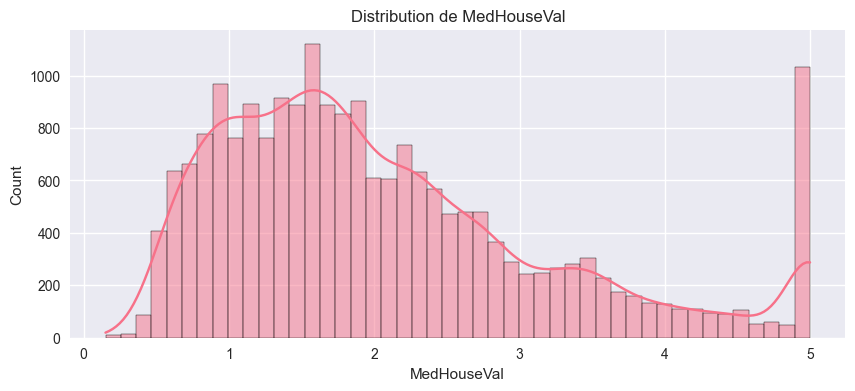

In [16]:
# VOTRE CODE ICI - Créez un graphique de distribution de la variable cible
# Indice: utilisez plt.hist() ou sns.histplot()
# Petite vue de la distribution de la cible
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data["MedHouseVal"], kde=True, ax=ax)
ax.set_title("Distribution de MedHouseVal")

print("\n📊 Distribution de la variable cible (MedHouseVal):")

In [17]:
# VOTRE CODE ICI
plt.figure(figsize=(10, 6))
# Créez l'histogramme de MedHouseVal
plt.show()

<Figure size 1000x600 with 0 Axes>

In [18]:
# VOTRE CODE ICI - Créez une matrice de corrélation
print("\n🔗 Matrice de corrélation entre toutes les variables:")


🔗 Matrice de corrélation entre toutes les variables:


In [19]:
# VOTRE CODE ICI
# Calculez la matrice de corrélation et affichez-la avec un heatmap
dataset = fetch_california_housing(as_frame=True)
data = dataset.frame                      # <-- DataFrame avec les 8 features + target

# Matrice de corrélation
corr = data.corr()

print(corr)


               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

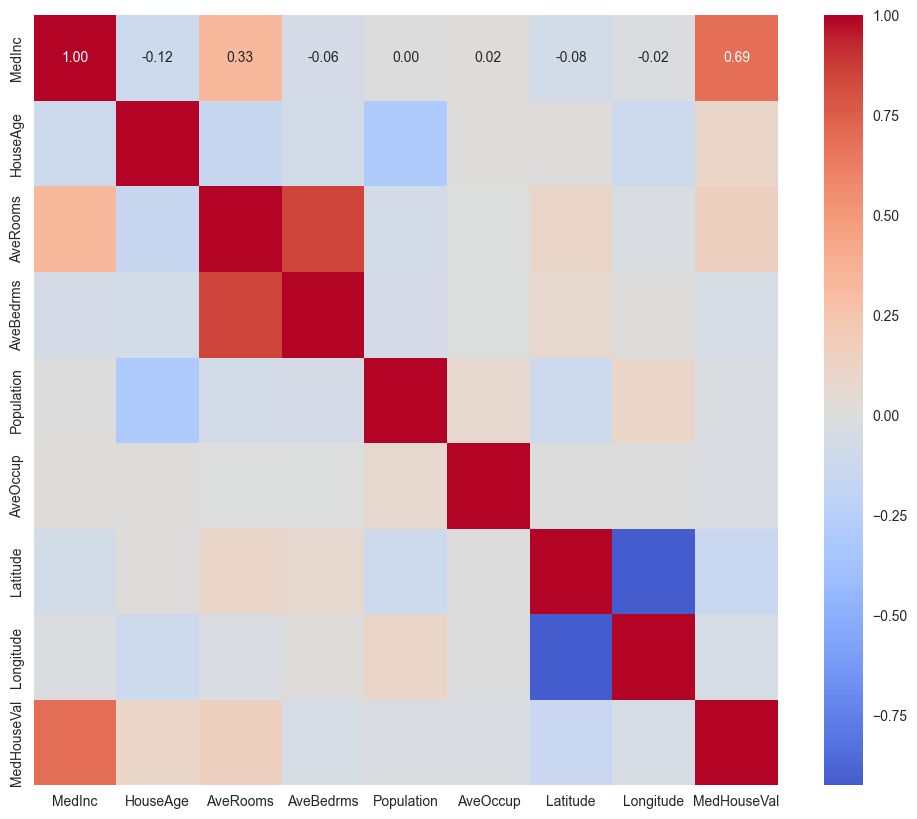

In [20]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
# Créez le heatmap
plt.show()

In [21]:
# QUESTION 2: Analyse des corrélations
"""
❓ QUESTION 2:
En observant la matrice de corrélation:
- Quelles variables sont le plus corrélées avec MedHouseVal (notre target) ?
- Y a-t-il des variables très corrélées entre elles (multicolinéarité) ?
- Quelles sont vos hypothèses sur les relations observées ?

VOTRE RÉPONSE ICI:
[Analysez les corrélations et donnez vos hypothèses]
"""

'\n❓ QUESTION 2:\nEn observant la matrice de corrélation:\n- Quelles variables sont le plus corrélées avec MedHouseVal (notre target) ?\n- Y a-t-il des variables très corrélées entre elles (multicolinéarité) ?\n- Quelles sont vos hypothèses sur les relations observées ?\n\nVOTRE RÉPONSE ICI:\n[Analysez les corrélations et donnez vos hypothèses]\n'

============================================================================
ÉTAPE 3: PRÉPARATION DES DONNÉES
============================================================================

In [22]:
print("\n\n🛠️ ÉTAPE 3: PRÉPARATION DES DONNÉES")
print("="*60)



🛠️ ÉTAPE 3: PRÉPARATION DES DONNÉES


In [23]:
# Séparation des features et du target
print("📊 Séparation des variables explicatives (X) et de la cible (y)")

📊 Séparation des variables explicatives (X) et de la cible (y)


In [24]:
# VOTRE CODE ICI - Séparez X (features) et y (target)
# Indice: toutes les colonnes sauf 'MedHouseVal' pour X, et 'MedHouseVal' pour y
X = data.drop("MedHouseVal", axis=1)   # Features
y = data["MedHouseVal"]

In [25]:
print(f"✅ X shape: {X.shape}")
print(f"✅ y shape: {y.shape}")

✅ X shape: (20640, 8)
✅ y shape: (20640,)


In [26]:
# Train/Test Split
print("\n🔄 Division train/test (80%/20%)")


🔄 Division train/test (80%/20%)


In [27]:
# VOTRE CODE ICI - Divisez les données en train/test
# Indice: utilisez train_test_split avec test_size=0.2 et random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [28]:
print(f"✅ Train set: {X_train.shape[0]} observations")
print(f"✅ Test set: {X_test.shape[0]} observations")

✅ Train set: 16512 observations
✅ Test set: 4128 observations


In [29]:
# Standardisation des données (optionnel mais recommandé)
print("\n📏 Standardisation des features")


📏 Standardisation des features


In [30]:
# VOTRE CODE ICI - Créez un StandardScaler et transformez X_train et X_test
# Indice: fit sur train, transform sur train et test
scaler = StandardScaler()

# VOTRE CODE ICI
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
print("✅ Standardisation terminée")

✅ Standardisation terminée


============================================================================
ÉTAPE 4: MODÉLISATION - RÉGRESSION LINÉAIRE SIMPLE
============================================================================

In [32]:
print("\n\n🤖 ÉTAPE 4: MODÉLISATION - RÉGRESSION LINÉAIRE")
print("="*60)



🤖 ÉTAPE 4: MODÉLISATION - RÉGRESSION LINÉAIRE


In [33]:
print("🏠 Construction du modèle de régression linéaire")

🏠 Construction du modèle de régression linéaire


In [34]:
# VOTRE CODE ICI - Créez et entraînez un modèle LinearRegression
model_linear =  LinearRegression().fit(X_train_scaled,y_train)

# Entraînez le modèle

In [35]:
print("✅ Modèle linéaire entraîné")

✅ Modèle linéaire entraîné


In [36]:
# Prédictions
# VOTRE CODE ICI - Faites des prédictions sur train et test
y_train_pred_linear = model_linear.predict(X_train_scaled)
y_test_pred_linear = model_linear.predict(X_test_scaled)

In [37]:
# Évaluation
print("\n📊 Évaluation du modèle linéaire:")


📊 Évaluation du modèle linéaire:


In [38]:
# VOTRE CODE ICI - Calculez MAE, RMSE et R² pour train et test
# Train
train_mae_linear = mean_absolute_error(y_train,y_train_pred_linear)
train_rmse_linear = mean_squared_error(y_train,y_train_pred_linear, squared=False)
train_r2_linear = r2_score(y_train, y_train_pred_linear)

In [39]:
# Test
test_mae_linear = mean_absolute_error(y_test,y_test_pred_linear)
test_rmse_linear = mean_squared_error(y_test,y_test_pred_linear)
test_r2_linear = r2_score(y_test,y_test_pred_linear)

In [40]:
print(f"📈 TRAIN - MAE: {train_mae_linear:.3f}, RMSE: {train_rmse_linear:.3f}, R²: {train_r2_linear:.3f}")
print(f"📉 TEST  - MAE: {test_mae_linear:.3f}, RMSE: {test_rmse_linear:.3f}, R²: {test_r2_linear:.3f}")

📈 TRAIN - MAE: 0.529, RMSE: 0.720, R²: 0.613
📉 TEST  - MAE: 0.533, RMSE: 0.556, R²: 0.576


============================================================================
ÉTAPE 5: MODÈLES AVANCÉS
============================================================================

In [41]:
print("\n\n🚀 ÉTAPE 5: MODÈLES AVANCÉS")
print("="*60)



🚀 ÉTAPE 5: MODÈLES AVANCÉS


VOTRE CODE ICI - Créez et entraînez les modèles suivants:
1. Ridge Regression (alpha=1.0)
2. Lasso Regression (alpha=0.1)  
3. Random Forest (n_estimators=100, random_state=42)

In [42]:
print("🌲 Construction des modèles avancés...")

🌲 Construction des modèles avancés...


In [43]:
# Ridge
model_ridge = Ridge(alpha=1.0).fit(X_train_scaled,y_train)

In [44]:
# Lasso  
model_lasso = Lasso(alpha=0.1).fit(X_train_scaled,y_train)

In [45]:
# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_scaled,y_train)

In [46]:
print("✅ Tous les modèles sont entraînés")

✅ Tous les modèles sont entraînés


============================================================================
ÉTAPE 6: COMPARAISON DES MODÈLES
============================================================================

In [47]:
print("\n\n⚖️ ÉTAPE 6: COMPARAISON DES MODÈLES")
print("="*60)



⚖️ ÉTAPE 6: COMPARAISON DES MODÈLES


VOTRE CODE ICI - Créez un DataFrame pour comparer les performances
Calculez les métriques pour tous les modèles et créez un tableau comparatif

In [48]:
models = {
    'Linear': model_linear,
    'Ridge': model_ridge, 
    'Lasso': model_lasso,
    'Random Forest': model_rf
}

In [49]:
results = []

In [50]:
for name, model in models.items():
    # VOTRE CODE ICI - Calculez les métriques pour chaque modèle
    # Prédictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Métriques
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred,squared=False) 
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    
    results.append({
        'Model': name,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Overfitting': train_r2 - test_r2
    })

In [51]:
results_df = pd.DataFrame(results)
print("📊 Comparaison des performances:")
print(results_df.round(4))

📊 Comparaison des performances:
           Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Overfitting
0         Linear    0.6126   0.5758      0.7197     0.7456       0.0368
1          Ridge    0.6126   0.5758      0.7197     0.7456       0.0367
2          Lasso    0.4974   0.4814      0.8197     0.8244       0.0161
3  Random Forest    0.9736   0.8053      0.1880     0.5051       0.1683


In [52]:
# QUESTION 3: Analyse des résultats
"""
❓ QUESTION 3:
En analysant le tableau de comparaison:
- Quel modèle performe le mieux sur les données de test ?    Random Forest 
- Y a-t-il des signes d'overfitting ? Comment le détectez-vous ? écart = 0.1 
- Quel modèle recommanderiez-vous et pourquoi ? Random Forest R2 est grand , RMSE est faible 

VOTRE RÉPONSE ICI:
[Analysez les résultats et justifiez votre choix]

"""

"\n❓ QUESTION 3:\nEn analysant le tableau de comparaison:\n- Quel modèle performe le mieux sur les données de test ?    Random Forest \n- Y a-t-il des signes d'overfitting ? Comment le détectez-vous ? écart = 0.1 \n- Quel modèle recommanderiez-vous et pourquoi ? Random Forest R2 est grand , RMSE est faible \n\nVOTRE RÉPONSE ICI:\n[Analysez les résultats et justifiez votre choix]\n\n"

============================================================================
ÉTAPE 7: VISUALISATION DES RÉSULTATS
============================================================================

In [53]:
print("\n\n📊 ÉTAPE 7: VISUALISATION DES RÉSULTATS")
print("="*60)



📊 ÉTAPE 7: VISUALISATION DES RÉSULTATS


VOTRE CODE ICI - Créez des visualisations pour analyser les modèles
1. Graphique des prédictions vs réalité pour le meilleur modèle
2. Distribution des résidus
3. Importance des features (pour Random Forest)

In [54]:
# Sélectionnez votre meilleur modèle
best_model = model_rf # VOTRE CODE ICI (ex: model_rf)
best_model_name ="Random Forest"  # VOTRE CODE ICI (ex: "Random Forest")

print(best_model)

RandomForestRegressor(random_state=42)


In [55]:
# Graphique 1: Prédictions vs Réalité
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Random Forest: Prédictions vs Réalité')

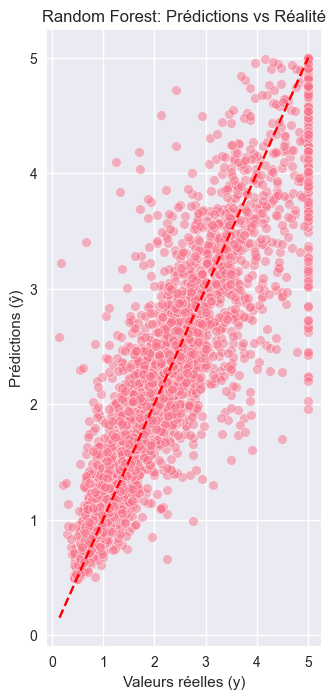

In [56]:
plt.subplot(1, 3, 1)
# VOTRE CODE ICI - Créez un scatter plot prédictions vs réalité
y_test_pred_random= best_model.predict(X_test_scaled)
sns.scatterplot(x=y_test, y=y_test_pred_random, alpha=0.5)
m, M = y_test.min(), y_test.max()
plt.plot([m, M], [m, M], '--', color='red')
plt.xlabel("Valeurs réelles (y)")
plt.ylabel("Prédictions (ŷ)")
plt.title(f'{best_model_name}: Prédictions vs Réalité')

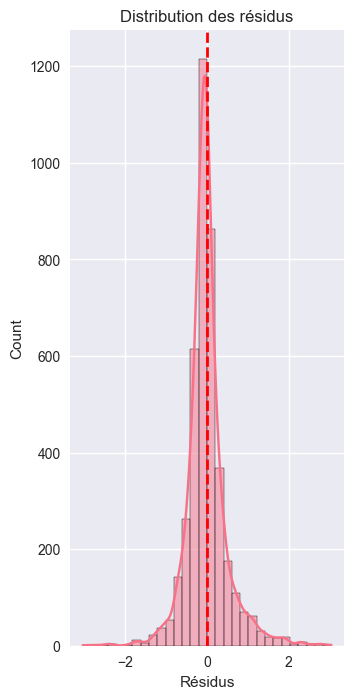

In [57]:
# Graphique 2: Distribution des résidus
plt.subplot(1, 3, 2)
# VOTRE CODE ICI - Calculez les résidus et créez un histogramme
residuals =  y_test - y_test_pred_random


# 3) Distribution des résidus
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color="red", linestyle="--", lw=2)
plt.xlabel("Résidus")
plt.title("Distribution des résidus")
plt.show()

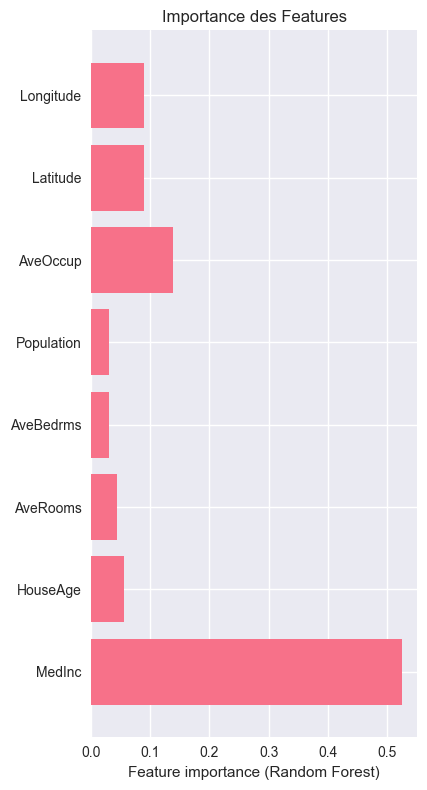

In [58]:
# Graphique 3: Importance des features (si Random Forest)
plt.subplot(1, 3, 3)
if hasattr(best_model, 'feature_importances_'):
    # VOTRE CODE ICI - Affichez l'importance des features
    feature_names =  X_train.columns
    importances= best_model.feature_importances_
    plt.title('Importance des Features')
    plt.barh(feature_names, importances)
    plt.xlabel("Feature importance (Random Forest)")
    plt.tight_layout()
    plt.show()

In [59]:
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

============================================================================
ÉTAPE 8: INTERPRÉTATION BUSINESS ET RECOMMANDATIONS
============================================================================

In [60]:
print("\n\n💼 ÉTAPE 8: INTERPRÉTATION BUSINESS")
print("="*60)



💼 ÉTAPE 8: INTERPRÉTATION BUSINESS


In [61]:
print("🎯 Résumé de l'analyse:")
print(f"✅ Meilleur modèle: {best_model_name}")
print(f"✅ R² sur test: { 0.8053:.3f}")
print(f"✅ RMSE sur test: {0.5051:.3f} (en centaines de milliers de $)")

🎯 Résumé de l'analyse:
✅ Meilleur modèle: Random Forest
✅ R² sur test: 0.805
✅ RMSE sur test: 0.505 (en centaines de milliers de $)


In [62]:
# QUESTION 4: Recommandations business
"""
❓ QUESTION 4 - RECOMMANDATIONS BUSINESS:

Basé sur votre analyse, répondez aux questions suivantes:

1. **Précision du modèle**: Votre modèle est-il suffisamment précis pour être utilisé en production ? 
   oui parceque le RMSE est faible 

2. **Variables importantes**: Quelles sont les 3 variables les plus importantes pour prédire le prix ?
'MedInc',  'AveOccup', 'Latitude' et/ou 'Longitude 

   Que cela signifie-t-il en termes business ? \n

   Cela signifie que le prix dépend du revenu moyen des ménages dans la région, du nombre moyen de personnes par logement et de l'emplacement du logement. 


3. **Limitations**: Quelles sont les principales limitations de votre modèle ? 

le modèle est probablement sur-appris car l'Overfitting est de 0.1 

   Quelles améliorations proposeriez-vous ?  
   utilisé X Fold lors de l'échantillonnage des données de test et de train

4. **Recommandations**: Si vous étiez consultant pour une agence immobilière californienne, 
   quelles recommandations donneriez-vous basées sur cette analyse ?

VOTRE RÉPONSE ICI:
[Rédigez vos recommandations business détaillées]
"""

"\n❓ QUESTION 4 - RECOMMANDATIONS BUSINESS:\n\nBasé sur votre analyse, répondez aux questions suivantes:\n\n1. **Précision du modèle**: Votre modèle est-il suffisamment précis pour être utilisé en production ? \n   oui parceque le RMSE est faible \n\n2. **Variables importantes**: Quelles sont les 3 variables les plus importantes pour prédire le prix ?\n'MedInc',  'AveOccup', 'Latitude' et/ou 'Longitude \n\n   Que cela signifie-t-il en termes business ? \n\n\n   Cela signifie que le prix dépend du revenu moyen des ménages dans la région, du nombre moyen de personnes par logement et de l'emplacement du logement. \n\n\n3. **Limitations**: Quelles sont les principales limitations de votre modèle ? \n\nle modèle est probablement sur-appris car l'Overfitting est de 0.1 \n\n   Quelles améliorations proposeriez-vous ?  \n   utilisé X Fold lors de l'échantillonnage des données de test et de train\n\n4. **Recommandations**: Si vous étiez consultant pour une agence immobilière californienne, \n  

============================================================================
BONUS: PRÉDICTIONS SUR NOUVEAUX EXEMPLES
============================================================================

In [63]:
print("\n\n🎁 BONUS: PRÉDICTIONS SUR NOUVEAUX EXEMPLES")
print("="*60)



🎁 BONUS: PRÉDICTIONS SUR NOUVEAUX EXEMPLES


VOTRE CODE ICI - Créez quelques exemples fictifs et faites des prédictions
Exemple: une maison avec des caractéristiques moyennes, une maison de luxe, etc.

In [64]:
print("🏠 Exemples de prédictions:")

🏠 Exemples de prédictions:


In [65]:
# Exemple 1: Maison moyenne
exemple_moyen = pd.DataFrame([{
    'MedInc': 2,
    'HouseAge': 20.0,
    'AveRooms': 6,
    'AveBedrms': 1,
    'Population': 36,
    'AveOccup': 1,
    'Latitude': 37.85,
    'Longitude': -121
}])

prix_predit_moyen = best_model.predict(exemple_moyen)
print(prix_predit_moyen)
#exemple_moyen = # VOTRE CODE ICI - Créez un exemple avec des valeurs moyennes
#prix_predit_moyen = # VOTRE CODE ICI - Prédiction

[4.0459824]


In [66]:
# Exemple 2: Maison de luxe  
exemple_luxe = exemple_moyen = pd.DataFrame([{
    'MedInc': 17,
    'HouseAge': 3,
    'AveRooms': 3,
    'AveBedrms': 5,
    'Population': 4,
    'AveOccup': 4,
    'Latitude': 37.85,
    'Longitude': -121
}])# VOTRE CODE ICI - Créez un exemple avec des valeurs élevées
prix_predit_luxe = best_model.predict(exemple_luxe)# VOTRE CODE ICI - Prédiction
print(prix_predit_luxe)

[3.639364]


In [67]:
print(f"💰 Maison moyenne: {prix_predit_moyen[0]:.2f} centaines de milliers de $")
print(f"💎 Maison de luxe: {prix_predit_luxe[0]:.2f} centaines de milliers de $")

💰 Maison moyenne: 4.05 centaines de milliers de $
💎 Maison de luxe: 3.64 centaines de milliers de $


In [68]:
print("\n🎉 FÉLICITATIONS ! Vous avez terminé l'exercice de régression !")
print("📝 N'oubliez pas de répondre à toutes les questions dans les cellules markdown.")


🎉 FÉLICITATIONS ! Vous avez terminé l'exercice de régression !
📝 N'oubliez pas de répondre à toutes les questions dans les cellules markdown.


============================================================================
AIDE-MÉMOIRE
============================================================================

📚 AIDE-MÉMOIRE - Fonctions utiles:

CHARGEMENT DE DONNÉES:
- fetch_california_housing(as_frame=True)
- pd.DataFrame()

EXPLORATION:
- data.describe()
- data.corr()
- plt.hist(data['column'])
- sns.heatmap(correlation_matrix, annot=True)

PRÉPARATION:
- train_test_split(X, y, test_size=0.2, random_state=42)
- StandardScaler().fit_transform()

MODÈLES:
- LinearRegression().fit(X_train, y_train)
- Ridge(alpha=1.0).fit(X_train, y_train)
- Lasso(alpha=0.1).fit(X_train, y_train)
- RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

MÉTRIQUES:
- mean_absolute_error(y_true, y_pred)
- mean_squared_error(y_true, y_pred, squared=False)  # RMSE
- r2_score(y_true, y_pred)

VISUALISATION:
- plt.scatter(y_true, y_pred)
- plt.hist(residuals)
- plt.barh(feature_names, importances)
